# Importing the Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Reading the Dataset

In [33]:
df = pd.read_csv("hatla2ee_scraped_data.csv")
df

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL
0,Kia Sportage 2024,"2,800,000 EGP",Dark grey,300 Km,Kia,Sportage,Tagamo3 - New Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/kia/sportage/62...
1,Chery Arrizo 5 2022,NaN,Bronze,"86,000 Km",Chery,Arrizo 5,Nasr city,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/chery/Arrizo-5/...
2,Fiat Tipo 2021,"1,200,000 EGP",Petroleum,"131,000 Km",Fiat,Tipo,Kafr el-Dawwar,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/fiat/tipo/6286701
3,Hyundai Tucson Turbo GDI 2021,"2,050,000 EGP",Black,"125,000 Km",Hyundai,Tucson Turbo GDI,Nasr city,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/hyundai/Tucson-...
4,BMW X1 2018,"2,050,000 EGP",Gray,"84,000 Km",BMW,X1,Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/bmw/x1/6254123
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33554,Jac J3 2021,"900,000 EGP",White,"240,000 Km",Jac,J3,6 October,2024-02-16,Yes,No,No,No,https://eg.hatla2ee.com/en/car/jac/j3/6286737
33555,Skoda Kodiaq 2023,"3,000,000 EGP",Dark grey,NaN,Skoda,Kodiaq,Tagamo3 - New Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/skoda/kodiaq/62...
33556,MG 5 2022,"1,170,000 EGP",Black,"48,000 Km",MG,5,Kafr el-Dawwar,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/moris-garage/mg...
33557,Hyundai Verna 2010,"285,000 EGP",White,"175,000 Km",Hyundai,Verna,Alexandria,2024-02-16,No,No,Yes,Yes,https://eg.hatla2ee.com/en/car/hyundai/verna/6...


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33559 entries, 0 to 33558
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    33559 non-null  object
 1   Price                   32625 non-null  object
 2   Color                   33559 non-null  object
 3   Mileage                 31440 non-null  object
 4   Make                    33559 non-null  object
 5   Model                   33559 non-null  object
 6   City                    33559 non-null  object
 7   Date Displayed          33559 non-null  object
 8   Automatic Transmission  33559 non-null  object
 9   Air Conditioner         33559 non-null  object
 10  Power Steering          33559 non-null  object
 11  Remote Control          33559 non-null  object
 12  Item URL                33559 non-null  object
dtypes: object(13)
memory usage: 3.3+ MB


In [35]:
df.isna().sum()

Name                         0
Price                      934
Color                        0
Mileage                   2119
Make                         0
Model                        0
City                         0
Date Displayed               0
Automatic Transmission       0
Air Conditioner              0
Power Steering               0
Remote Control               0
Item URL                     0
dtype: int64

In [36]:
df.isna().mean() * 100 # percentage of nulls

Name                      0.000000
Price                     2.783158
Color                     0.000000
Mileage                   6.314253
Make                      0.000000
Model                     0.000000
City                      0.000000
Date Displayed            0.000000
Automatic Transmission    0.000000
Air Conditioner           0.000000
Power Steering            0.000000
Remote Control            0.000000
Item URL                  0.000000
dtype: float64

# Data Cleaning and Preprocessing

* ## handling boolean columns

In [37]:
columns_to_transform = ['Automatic Transmission', 'Air Conditioner', 'Power Steering', 'Remote Control']
mapping = {'Yes': True, 'No': False}

for col in columns_to_transform:
    df[col] = df[col].map(mapping)

print(df[columns_to_transform].head())

   Automatic Transmission  Air Conditioner  Power Steering  Remote Control
0                    True             True            True            True
1                    True             True            True            True
2                    True             True            True            True
3                    True             True            True            True
4                    True             True            True            True


* ## handling numeric columns

In [38]:
df["Price"] = df["Price"].str.replace('EGP', '').str.replace(',', '').astype(float)

df["Mileage"] = df["Mileage"].str.replace('Km', '').str.replace(',', '').astype(float)

print(df[["Price", "Mileage"]].head())

       Price   Mileage
0  2800000.0     300.0
1        NaN   86000.0
2  1200000.0  131000.0
3  2050000.0  125000.0
4  2050000.0   84000.0


* ## Handling duplicates

In [39]:
df.drop_duplicates(inplace=True)

* ## Missing values

In [40]:
df.isna().sum()

Name                         0
Price                       71
Color                        0
Mileage                   1208
Make                         0
Model                        0
City                         0
Date Displayed               0
Automatic Transmission       0
Air Conditioner              0
Power Steering               0
Remote Control               0
Item URL                     0
dtype: int64

In [41]:
df.isna().mean() * 100

Name                      0.000000
Price                     0.321966
Color                     0.000000
Mileage                   5.477961
Make                      0.000000
Model                     0.000000
City                      0.000000
Date Displayed            0.000000
Automatic Transmission    0.000000
Air Conditioner           0.000000
Power Steering            0.000000
Remote Control            0.000000
Item URL                  0.000000
dtype: float64

In [42]:
df.dropna(subset="Price", inplace=True)
df["Mileage"].fillna(df["Mileage"].median(),inplace=True)

C:\Users\Jou\AppData\Local\Temp\ipykernel_20584\2592195587.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Mileage"].fillna(df["Mileage"].median(),inplace=True)


In [43]:
df.isna().sum()

Name                      0
Price                     0
Color                     0
Mileage                   0
Make                      0
Model                     0
City                      0
Date Displayed            0
Automatic Transmission    0
Air Conditioner           0
Power Steering            0
Remote Control            0
Item URL                  0
dtype: int64

In [44]:
df.head()

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL
0,Kia Sportage 2024,2800000.0,Dark grey,300.0,Kia,Sportage,Tagamo3 - New Cairo,2024-02-16,True,True,True,True,https://eg.hatla2ee.com/en/car/kia/sportage/62...
2,Fiat Tipo 2021,1200000.0,Petroleum,131000.0,Fiat,Tipo,Kafr el-Dawwar,2024-02-16,True,True,True,True,https://eg.hatla2ee.com/en/car/fiat/tipo/6286701
3,Hyundai Tucson Turbo GDI 2021,2050000.0,Black,125000.0,Hyundai,Tucson Turbo GDI,Nasr city,2024-02-16,True,True,True,True,https://eg.hatla2ee.com/en/car/hyundai/Tucson-...
4,BMW X1 2018,2050000.0,Gray,84000.0,BMW,X1,Cairo,2024-02-16,True,True,True,True,https://eg.hatla2ee.com/en/car/bmw/x1/6254123
5,Chevrolet Optra 2021,700000.0,Blue,75000.0,Chevrolet,Optra,Obour City,2024-02-16,True,True,True,True,https://eg.hatla2ee.com/en/car/chevrolet/optra...


* ## Categorical Data

In [45]:
df["Made_year"] = df["Name"].apply(lambda x:x.split()[-1]).astype("int")
df["Made_year"]


0        2024
2        2021
3        2021
4        2018
5        2021
         ... 
31734    2020
31735    2024
31736    2013
31737    2023
31738    2009
Name: Made_year, Length: 21981, dtype: int32

In [46]:
df["Date Displayed"] = df["Date Displayed"].apply(lambda x:x[:4]).astype("int")
df["Date Displayed"].unique()

array([2024, 2023])

In [47]:
df["Years_of_usage"] = df["Date Displayed"] - df["Made_year"]
df["Years_of_usage"]

0         0
2         3
3         3
4         6
5         3
         ..
31734     4
31735     0
31736    11
31737     1
31738    15
Name: Years_of_usage, Length: 21981, dtype: int32

In [48]:
df[df["Years_of_usage"] < 0]

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL,Made_year,Years_of_usage
6636,Geely GX3 Pro 2024,1050000.0,Red,12.0,Geely,GX3 Pro,Cairo,2023,True,True,True,True,https://eg.hatla2ee.com/en/car/geely/GX3-pro/6...,2024,-1
8340,Toyota Fortuner 2024,4100000.0,Silver,10000.0,Toyota,Fortuner,Giza,2023,False,False,False,False,https://eg.hatla2ee.com/en/car/toyota/fortuner...,2024,-1
8495,Suzuki Swift 2024,253500.0,White,0.0,Suzuki,Swift,Nasr city,2023,False,False,False,False,https://eg.hatla2ee.com/en/car/suzuki/swift/61...,2024,-1
8497,Suzuki Celerio 2024,232500.0,Blue,0.0,Suzuki,Celerio,Nasr city,2023,False,False,False,False,https://eg.hatla2ee.com/en/car/suzuki/celerio/...,2024,-1
8536,Chery Tiggo 3 2024,1250000.0,Dark red,10000.0,Chery,Tiggo 3,Obour City,2023,True,True,True,True,https://eg.hatla2ee.com/en/car/chery/Tiggo3/61...,2024,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21019,MG ZS 2024,990000.0,Red,127000.0,MG,ZS,Sheikh Zayed City,2023,False,False,False,False,https://eg.hatla2ee.com/en/car/moris-garage/zs...,2024,-1
21128,BMW X3 2024,4500000.0,Blue,127000.0,BMW,X3,Tagamo3 - New Cairo,2023,True,True,True,True,https://eg.hatla2ee.com/en/car/bmw/x3/6091362,2024,-1
21454,Hyundai Accent RB 2024,1130000.0,Silver,15000.0,Hyundai,Accent RB,Tagamo3 - New Cairo,2023,True,True,True,True,https://eg.hatla2ee.com/en/car/hyundai/Accent-...,2024,-1
21701,Kia Sportage 2024,2150000.0,Black,1000.0,Kia,Sportage,Giza,2023,True,True,True,True,https://eg.hatla2ee.com/en/car/kia/sportage/60...,2024,-1


In [49]:
df["Years_of_usage"].replace({-1:0}, inplace=True)
df[df["Years_of_usage"] < 0]


,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL,Made_year,Years_of_usage


In [50]:
df.drop(["Name", "Color", "Date Displayed", "Item URL","City"], axis=1, inplace=True)
df

,Price,Mileage,Make,Model,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Made_year,Years_of_usage
0,2800000.0,300.0,Kia,Sportage,True,True,True,True,2024,0
2,1200000.0,131000.0,Fiat,Tipo,True,True,True,True,2021,3
3,2050000.0,125000.0,Hyundai,Tucson Turbo GDI,True,True,True,True,2021,3
4,2050000.0,84000.0,BMW,X1,True,True,True,True,2018,6
5,700000.0,75000.0,Chevrolet,Optra,True,True,True,True,2021,3
...,...,...,...,...,...,...,...,...,...,...
31734,560000.0,127000.0,Chery,Arrizo 5,True,True,True,True,2020,4
31735,860000.0,7000.0,Nissan,Sunny,True,True,True,True,2024,0
31736,1000000.0,250000.0,Brilliance,V5,True,True,True,True,2013,11
31737,3650000.0,11000.0,BMW,320,True,True,True,True,2023,1


In [51]:
label_encoder_columns = ['Make','Model', "Made_year"]
label_encoder = LabelEncoder()

for col in label_encoder_columns:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,Price,Mileage,Make,Model,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Made_year,Years_of_usage
0,2800000.0,300.0,59,738,True,True,True,True,56,0
2,1200000.0,131000.0,32,789,True,True,True,True,53,3
3,2050000.0,125000.0,47,805,True,True,True,True,53,3
4,2050000.0,84000.0,5,842,True,True,True,True,50,6
5,700000.0,75000.0,18,618,True,True,True,True,53,3


* ## Scalling numeric

In [52]:
for col in ["Mileage", "Price"]:
    df[col] = np.log1p(df[col])

df

,Price,Mileage,Make,Model,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Made_year,Years_of_usage
0,14.845130,5.707110,59,738,True,True,True,True,56,0
2,13.997833,11.782960,32,789,True,True,True,True,53,3
3,14.533351,11.736077,47,805,True,True,True,True,53,3
4,14.533351,11.338584,5,842,True,True,True,True,50,6
5,13.458837,11.225257,18,618,True,True,True,True,53,3
...,...,...,...,...,...,...,...,...,...,...
31734,13.235694,11.751950,17,158,True,True,True,True,52,4
31735,13.664689,8.853808,76,743,True,True,True,True,56,0
31736,13.815512,12.429220,9,812,True,True,True,True,45,11
31737,15.110238,9.305741,5,65,True,True,True,True,55,1


In [53]:
# df.to_csv("processed_data.csv", index=False)

# Model TRAINING

In [54]:
X = df.drop(columns='Price')
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

In [55]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
y_pred_lin = linear_model.predict(X_test)
result = pd.DataFrame({'Y' : y_test,'Y_pred' : y_pred_lin, 'diff':abs(y_pred_lin-y_test)})
result

,Y,Y_pred,diff
3980,12.409018,12.158323,0.250695
11624,12.577640,11.510378,1.067262
7408,13.652993,13.187468,0.465525
14519,12.013707,12.344453,0.330746
17904,12.736704,12.543646,0.193058
...,...,...,...
16527,12.706851,13.036633,0.329782
15060,12.542548,12.949777,0.407229
11288,13.226725,13.427643,0.200918
5647,12.611541,13.073339,0.461798


In [56]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
result = pd.DataFrame({'Y' : y_test,'Y_pred' : y_pred_knn, 'diff':abs(y_pred_knn-y_test)})
result

,Y,Y_pred,diff
3980,12.409018,12.099882,0.309135
11624,12.577640,12.461716,0.115924
7408,13.652993,13.547547,0.105446
14519,12.013707,12.457485,0.443778
17904,12.736704,12.817408,0.080704
...,...,...,...
16527,12.706851,12.897674,0.190823
15060,12.542548,12.766136,0.223588
11288,13.226725,13.404849,0.178124
5647,12.611541,12.567976,0.043565


# Comparisons

In [57]:
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mse_lin =mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn =mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"Linear Regression: MAE: {mae_lin:.4f}, MSE: {mse_lin:.4f}, r2 score: {r2_lin:.4f}")
print("-----------------------------------------------------------")
print(f"K-Nearest Neighbors: MAE: {mae_knn:.4f}, MSE: {mse_knn:.4f}, r2 score: {r2_knn:.4f}")

Linear Regression: MAE: 0.4043, MSE: 0.2842, r2 score: 0.6118
-----------------------------------------------------------
K-Nearest Neighbors: MAE: 0.1884, MSE: 0.0887, r2 score: 0.8789


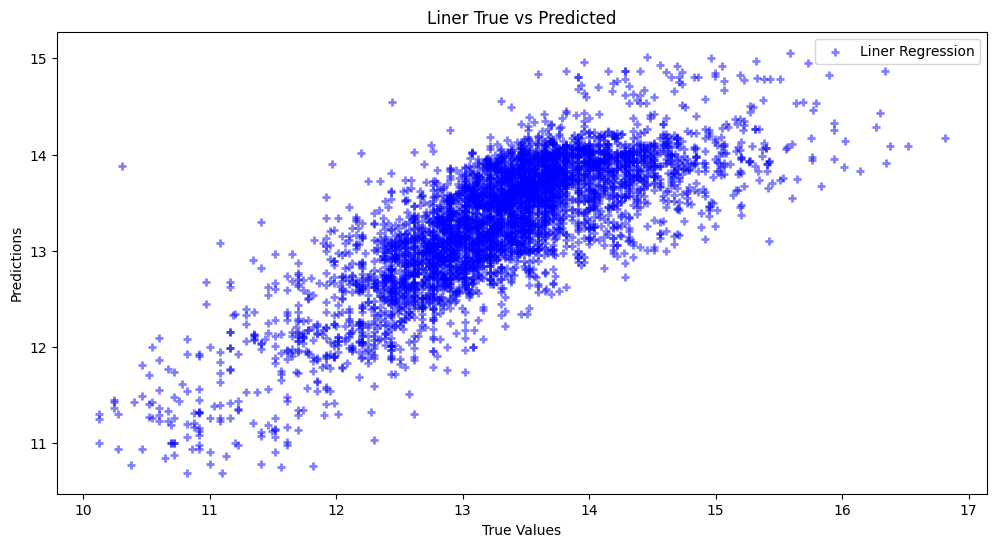

In [58]:
plt.figure(figsize=(12,6))

plt.scatter(y_test, y_pred_lin, color='blue', alpha=.5,lw=2, label='Liner Regression',marker='+')

plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Liner True vs Predicted")
plt.legend()
plt.show()

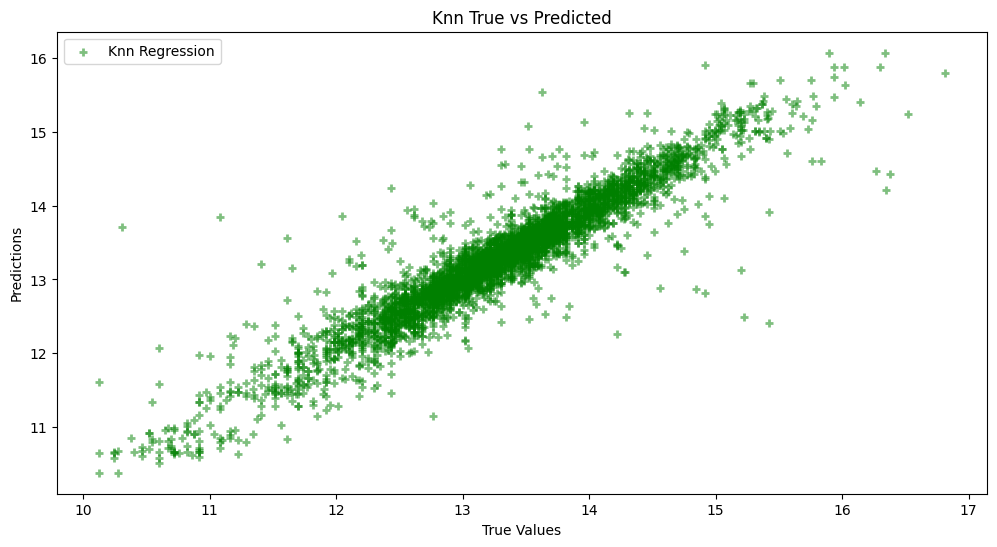

In [59]:
plt.figure(figsize=(12,6))

plt.scatter(y_test, y_pred_knn, color='green', alpha=.5,lw=2, label='Knn Regression',marker='+')

plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Knn True vs Predicted")
plt.legend()
plt.show()